# Tarea 04 | Josue Alexis Campos Negron


## Librerias


In [ ]:
import numpy as np
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

## Funciones utiles
En esta seccion tenemos funciones que son de utilidad para la presentacion de resultados como la graficacion de los puntos, el MSE, la presicion entre otras cosas.

In [ ]:
# Funcion graficadora

# D - conjunto de datos
# res - clasificacion con perceptron
def graphicFunction(D, res):
  for i in range(len(D)):
    v = D[i]
    x = v[0]
    if res[i] == 1.0:
      plt.scatter(x[1], x[2], marker='o', color="green")
    else:
      plt.scatter(x[1], x[2], marker='o', color="red")
  plt.show()

# Funcion que calcula el error cuadratico
def MSE_function(A, B):
  MSE = 0
  n = len(A)
  for i in range(n):
    MSE += (A[i] - B[i])**2
  return MSE / N

# Funcion que extrae resultado real
def extractorRealResults(D):
  n = len(D)
  real_res = [0] * n
  for i in range(n):
    v = D[i]
    y = v[1]
    real_res[i] = y
  return real_res


# Funcion que evalua

# D - conjunto de datos
# res - clasificacion con perceptron y valor sigmoide
def printResults(D, res):
  n = len(D)
  estimate_res = [0] * n

  # Decodificamos los valores de sigmoide
  for i in range(n):
    if res[i] > 0.5:
      estimate_res[i] = 1.0
    else:
      estimate_res[i] = 0.0

  # Grafica
  graphicFunction(D, estimate_res)

  # Extraccion de resultado real
  real_res = extractorRealResults(D)

  # Error cuadratico medio
  MSE = MSE_function(real_res, res)
  print('El Error Cuadratico Medio es: ', MSE)

  # Muestras correctas
  hits = 0
  for i in range(n):
    if real_res[i] == estimate_res[i]:
      hits += 1 
  print('Muestras bien clasificadas: ', hits)
  print('Muestras mal clasificadas: ', n - hits)
  print('Presicion: ', hits / n, '\n')

## Entrenamiento del Perceptron

En esta seccion tenemos el entrenador del perceptron de dos capas, utilizamos la funcion de activacion Sigmoide, una matriz de pesos aleatorios, un conjunto de entrenamiento de 70 elementos y un factor de aprendizaje de 0.1. Tenemos que el entrenador del perceptron imprime el progreso de aprendizaje del perceptron cada 2000 iteraciones. Finalmente la funcion retorna la matriz de pesos despues del entrenamiento con los pesos correspondientes.



In [ ]:
# w1 - pesos de capa inicial -> capa oculta
# w2 - pesos de capa oculta -> capa final
# D - conjunto de entrenamiento
# cn - factor de aprendizaje
# g - funcion de activacion
# N - iteraciones

def training_perceptrons(w1, w2, D, cn, g, N):
  # Extraemos los resultados reales
  real_res = extractorRealResults(D)

  # Iteraciones de entramiento
  for r in range(N):
    # Elementos del conjunto de entrenamiento
    for v in D:
      x = v[0]
      y = v[1]
      sum_in_1 = [0] * 4
      a_1 = [0] * 5
      a_1[0] = -1

    # Propagation

      # Para cada nodo de la capa oculta
      for i in range(4):
        # Obtenemos in_i
        for j in range(len(x)):
          sum_in_1[i] += w1[j][i] * x[j]
        # Obtenemos a_i
        a_1[i + 1] = g(sum_in_1[i])


      # Para la capa de salida
      sum_in = 0
      a = 0
      # Para el unico nodo de la capa salida
      for j in range(len(w2)):
        sum_in += w2[j] * a_1[j]
      a = g(sum_in)

    # Backpropagation

      # Error capa salida
      delta = (y - a) * a * (1 - a)
      for j in range(len(w2)):
        # Actualizamos el vector de pesos
        w2[j] = w2[j] + (cn * a_1[j] * delta)

      # Error capa oculta
      delta_1 = [0] * 4

      # Para cada nodo de la capa oculta
      for j in range(4):
        # Calculamos el error
        delta_1[j] = a_1[j + 1] * (1 - a_1[j + 1]) * w2[j + 1] * delta

      #  Actualizamos el vector de pesos
      for i in range(3):
        for j in range(4):
          w1[i][j] = w1[i][j] + (cn * x[i] * delta_1[j])

    # Verifica el error MSE para detener el entrenamiento
    res = perceptron(D, w1, w2, g)
    if MSE_function(real_res, res) < 0.00001:
      return [w1, w2]

    # Imprime resultados periodicamente
    if (r % 2000) == 0:
      print('Iteracion ', r, ':')
      printResults(D, res)

  return [w1, w2]    

## Perceptron
Aqui presentamos al perceptron de dos capas con un a capa oculta de 4 neuronas y la capa salida de una neurona, la cual utiliza la matriz de pesos obtenida despues del entrenamiento, el conjunto de evaluacion de 30 elementos y la funcion de activacion Sigmoide. La funcion retorna un arreglo del mismo tamaño que el conjunto de validacion con los valores del sigmoide obtenido por cada elemento del conjunto de validacion.

In [ ]:
# D - conjunto de evaluacion
# w1 - pesos de capa inicial -> capa oculta
# w2 - pesos de capa oculta -> capa final
# g - funcion de activacion
def perceptron(D, w1, w2, g):
  # Vector output
  res = [0] * len(D)
  it = 0

  # Elementos del conjunto de evaluacion
  for v in D:
    x = v[0]
    y = v[1]
    sum_in_1 = [0] * 4
    a_1 = [0] * 5
    a_1[0] = -1

    # Propagation

    # Para cada nodo de la capa oculta
    for i in range(4):
      # Obtenemos in_i
      for j in range(len(x)):
        sum_in_1[i] += w1[j][i] * x[j]
      # Obtenemos a_i
      a_1[i + 1] = g(sum_in_1[i])


    # Para la capa de salida
    sum_in = 0
    a = 0
    # Para el unico nodo de la capa salida
    for j in range(len(w2)):
      sum_in += w2[j] * a_1[j]
    a = g(sum_in)

    # Adjuntamos resultados
    res[it] = a
    it += 1

  return res    

## Conjunto de datos 01
Vamos a presentar dos conjuntos de datos, dado que la eleccion de la muestra es aleatorio, el conjunto de entrenamiento y validacion tambien, mostramos que la presicion del perceptron varia deacuerdo al conjunto de entrenamiento y la muestra, ya que puede existir muestra que tenga una mayor cantidad de puntos en algun extremo y menos en otro, entonces al realizar el entrenamiento, dado que es pequeña la cantidad de puntos puede confundirlo con el otro conjunto de puntos.


### Clase positiva
Generamos el conjunto de puntos positivos que se encuentran dentro del rectangulo de vertices:
$$(2, 2), (2, 6), (8, 2) \quad \mbox{y} \quad (8, 6).$$

In [ ]:
x_positive = [0] * 50
y_positive = [0] * 50

for i in range(50):
  x_positive[i] = random.uniform(2.0, 8.0)
  y_positive[i] = random.uniform(2.0, 6.0)

# Puntos esquina
x_positive[0] = 2.0
x_positive[1] = 2.0
y_positive[0] = 2.0
y_positive[1] = 6.0
x_positive[2] = 8.0
x_positive[3] = 8.0
y_positive[2] = 2.0
y_positive[3] = 6.0

### Clase Negativa
Generamos el conjunto de puntos negativos que se encuentran fuera del rectangulo antes mencionado pero dentro del rectangulo de vertices:
$$(0, 0), (0, 8), (10, 0) \quad \mbox{y} \quad (10, 8).$$

In [ ]:
x_negative = [0] * 50
y_negative = [0] * 50

for i in range(50):
  x_negative[i] = random.uniform(0.0, 10.0)
  y_negative[i] = random.uniform(0.0, 8.0)

  while x_negative[i] >= 2.0 and x_negative[i] <= 8.0 and y_negative[i] >= 2.0 and y_negative[i] <= 6.0:
    x_negative[i] = random.uniform(0.0, 10.0)
    y_negative[i] = random.uniform(0.0, 8.0)

### Graficacion de la muestra
Graficamos la muestra donde los puntos verdes representan los puntos positivos y los puntos rojos los puntos negativos. Podemos visualizar mejor el rectangulo antes mencionado.

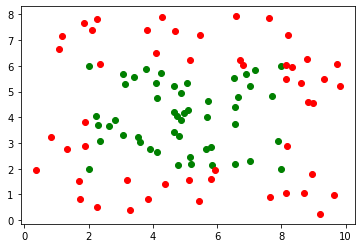

In [ ]:
plt.scatter([x_positive], [y_positive], marker="o", color="green")
plt.scatter([x_negative], [y_negative], marker="o", color="red")
plt.show()

### Conjunto de entrenamiento y validacion
En esta seccion seleccionamos los conjuntos de entrenamiento y validacion, los cuales graficamos para mayor visualizacion de la seleccion de puntos y que distribucion tienen respecto el cuadrante positivo.

Entrenamiento:


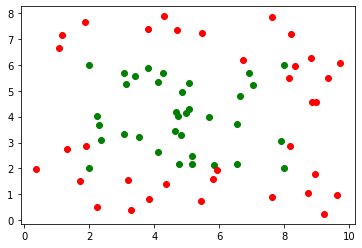


Evaluacion:


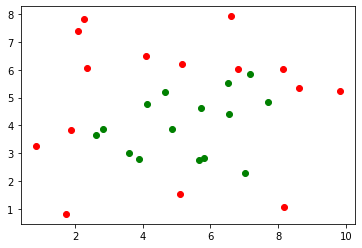

In [ ]:
v_train = [ [[-1, 0, 0], -1] ] * 70
v_evaluation = [ [[-1, 0, 0], -1] ] * 30

for i in range(35):
  v_train[i] = [[-1, x_positive[i], y_positive[i]], 1]
  v_train[i + 35] = [[-1, x_negative[i], y_negative[i]], 0]

for i in range(15):
  v_evaluation[i] = [[-1, x_positive[i + 35], y_positive[i + 35]], 1]
  v_evaluation[i + 15] = [[-1, x_negative[i + 35], y_negative[i + 35]], 0]

print('Entrenamiento:')
for i in range(len(v_train)):
  x = v_train[i][0]
  if i >= 0 and i < 35:
    plt.scatter(x[1], x[2], marker="o", color="green")
  else:
    plt.scatter(x[1], x[2], marker="o", color="red")
plt.show()

print('\nEvaluacion:')
for i in range(len(v_evaluation)):
  x = v_evaluation[i][0]
  if i >= 0 and i < 15:
    plt.scatter(x[1], x[2], marker="o", color="green")
  else:
    plt.scatter(x[1], x[2], marker="o", color="red")
plt.show()

### Realizamos el entrenamiento
En esta seccion generamos la matriz y vector aleatorio de pesos. Realizamos el entrenamiento para asi obtener los pesos que realiza una buena clasificacion del perceptron.

Iteracion  0 :


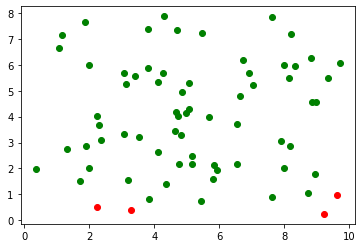

El Error Cuadratico Medio es:  0.001473231168020784
Muestras bien clasificadas:  39
Muestras mal clasificadas:  31
Presicion:  0.5571428571428572 

Iteracion  2000 :


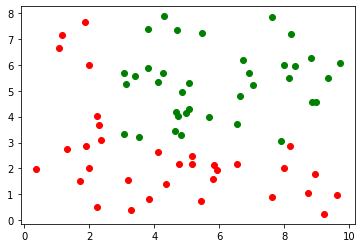

El Error Cuadratico Medio es:  0.0011483685689688897
Muestras bien clasificadas:  44
Muestras mal clasificadas:  26
Presicion:  0.6285714285714286 

Iteracion  4000 :


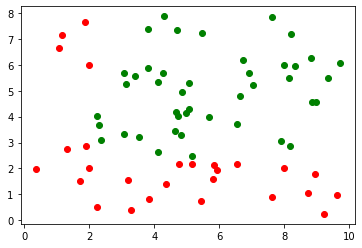

El Error Cuadratico Medio es:  0.001104398937374811
Muestras bien clasificadas:  48
Muestras mal clasificadas:  22
Presicion:  0.6857142857142857 

Iteracion  6000 :


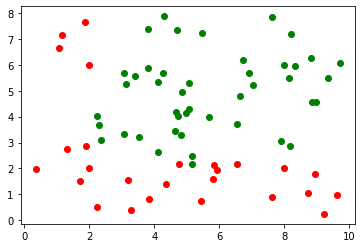

El Error Cuadratico Medio es:  0.0010868243698070002
Muestras bien clasificadas:  49
Muestras mal clasificadas:  21
Presicion:  0.7 

Iteracion  8000 :


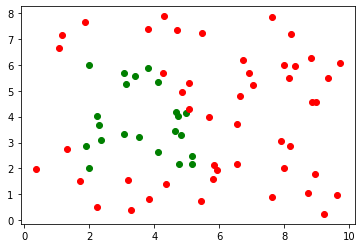

El Error Cuadratico Medio es:  0.0009144192293868707
Muestras bien clasificadas:  55
Muestras mal clasificadas:  15
Presicion:  0.7857142857142857 

Iteracion  10000 :


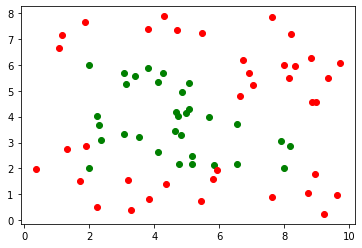

El Error Cuadratico Medio es:  0.0003773991549861924
Muestras bien clasificadas:  65
Muestras mal clasificadas:  5
Presicion:  0.9285714285714286 

Iteracion  12000 :


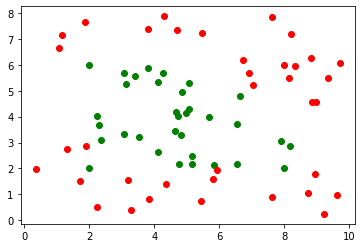

El Error Cuadratico Medio es:  0.0003239976904388809
Muestras bien clasificadas:  66
Muestras mal clasificadas:  4
Presicion:  0.9428571428571428 



In [ ]:
# Pesos de capa inicial -> capa oculta
w1 = [ [0.0] * 4 ] * 3
for i in range(3):
  w1[i] = [random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0)]
# Pesos de capa oculta -> capa final
w2 = [random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0)]
# Conjunto de entrenamiento
D = v_train
# Factor de aprendizaje
cn = 0.1
# Funcion de activacion sigmoide
def Sigmoide(x):
  return 1 / (1 + math.exp(-x))
# Iteraciones
N = 12001

# Entrenamiento
fw1, fw2 = training_perceptrons(w1, w2, D, cn, Sigmoide, N)

Cada $2000$ iteraciones podemos observar el progreso de aprendizaje del perceptron, vemos como para la ultima iteracion tenemos 
$$MSE = 0.0003239976904388809,$$
y una presicion de 
$$0.9428571428571428.$$
Por lo tanto podemos considerar que el perceptron clasifica de manera correcta el conjunto de entrenamiento.

### Realizamos la evaluacion
Con lo resultados obtenidos realizamos la evaluacion del conjunto de evaluacion y asi ver la clasificacion de este.

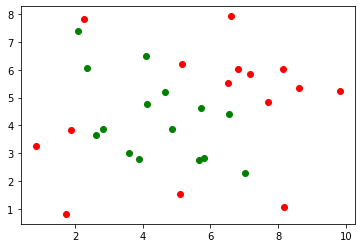

El Error Cuadratico Medio es:  0.00033781282417931334
Muestras bien clasificadas:  24
Muestras mal clasificadas:  6
Presicion:  0.8 



In [ ]:
# Conjunto de evaluacion
D = v_evaluation

res = perceptron(D, fw1, fw2, Sigmoide)

printResults(D, res)

Podemos notar que tiene una presicion de $0.8$ ya que clasifico incorrectamente a 6 puntos. Estos resultados, con los resultados del segundo conjunto de datos muestran como una buena seleccion del conjunto de entrenamiento como el de validacion son importantes, ya que el perceptron aprendio correctamente con el conjunto de validacion, sin embargo, la distribucion de los puntos de validacion son distinta y se tiene una menor presicion.

## Conjunto de datos 02
Ahora, presentamos un segundo conjunto de datos que tiene mejores resultados, dado que la muestra, el conjunto de entrenamiento y validacion son mas convenientes para mejores resultados. Unicamente analizaremos los resultados dado que los primeros bloques de codigo tienen la misma explicacion que el conjunto de datos 01.

### Clase positiva


In [ ]:
x_positive_B = [0] * 50
y_positive_B = [0] * 50

for i in range(50):
  x_positive_B[i] = random.uniform(2.0, 8.0)
  y_positive_B[i] = random.uniform(2.0, 6.0)

# Puntos esquina
x_positive_B[0] = 2.0
x_positive_B[1] = 2.0
y_positive_B[0] = 2.0
y_positive_B[1] = 6.0
x_positive_B[2] = 8.0
x_positive_B[3] = 8.0
y_positive_B[2] = 2.0
y_positive_B[3] = 6.0

### Clase negativa

In [ ]:
x_negative_B = [0] * 50
y_negative_B = [0] * 50

for i in range(50):
  x_negative_B[i] = random.uniform(0.0, 10.0)
  y_negative_B[i] = random.uniform(0.0, 8.0)

  while x_negative_B[i] >= 2.0 and x_negative_B[i] <= 8.0 and y_negative_B[i] >= 2.0 and y_negative_B[i] <= 6.0:
    x_negative_B[i] = random.uniform(0.0, 10.0)
    y_negative_B[i] = random.uniform(0.0, 8.0)

### Grafica de la muestra

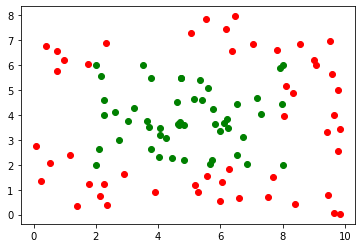

In [ ]:
plt.scatter([x_positive_B], [y_positive_B], marker="o", color="green")
plt.scatter([x_negative_B], [y_negative_B], marker="o", color="red")
plt.show()

### Conjunto de entrenamiento y validacion

Entrenamiento:


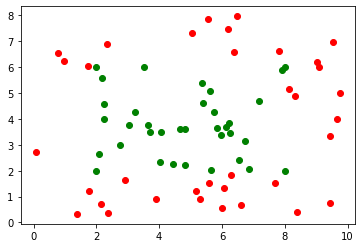


Evaluacion:


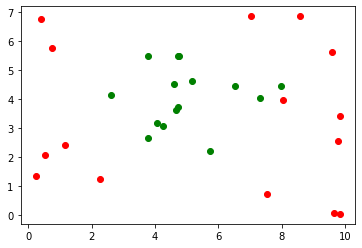

In [ ]:
v_train_B = [ [[-1, 0, 0], -1] ] * 70
v_evaluation_B = [ [[-1, 0, 0], -1] ] * 30

for i in range(35):
  v_train_B[i] = [[-1, x_positive_B[i], y_positive_B[i]], 1]
  v_train_B[i + 35] = [[-1, x_negative_B[i], y_negative_B[i]], 0]

for i in range(15):
  v_evaluation_B[i] = [[-1, x_positive_B[i + 35], y_positive_B[i + 35]], 1]
  v_evaluation_B[i + 15] = [[-1, x_negative_B[i + 35], y_negative_B[i + 35]], 0]

print('Entrenamiento:')
for i in range(len(v_train_B)):
  x = v_train_B[i][0]
  if i >= 0 and i < 35:
    plt.scatter(x[1], x[2], marker="o", color="green")
  else:
    plt.scatter(x[1], x[2], marker="o", color="red")
plt.show()

print('\nEvaluacion:')
for i in range(len(v_evaluation_B)):
  x = v_evaluation_B[i][0]
  if i >= 0 and i < 15:
    plt.scatter(x[1], x[2], marker="o", color="green")
  else:
    plt.scatter(x[1], x[2], marker="o", color="red")
plt.show()

Iteracion  0 :


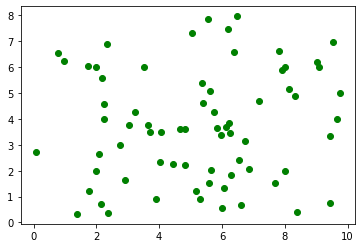

El Error Cuadratico Medio es:  0.0020459019761663263
Muestras bien clasificadas:  35
Muestras mal clasificadas:  35
Presicion:  0.5 

Iteracion  2000 :


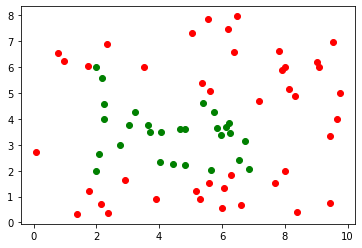

El Error Cuadratico Medio es:  0.00032073916451534493
Muestras bien clasificadas:  63
Muestras mal clasificadas:  7
Presicion:  0.9 

Iteracion  4000 :


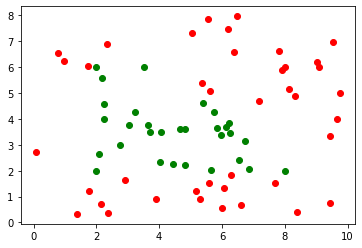

El Error Cuadratico Medio es:  0.00024744705675384254
Muestras bien clasificadas:  65
Muestras mal clasificadas:  5
Presicion:  0.9285714285714286 

Iteracion  6000 :


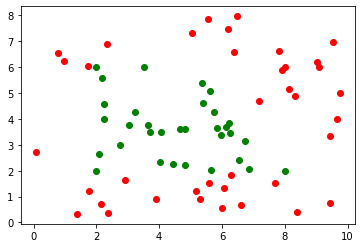

El Error Cuadratico Medio es:  0.00020126413723196463
Muestras bien clasificadas:  67
Muestras mal clasificadas:  3
Presicion:  0.9571428571428572 

Iteracion  8000 :


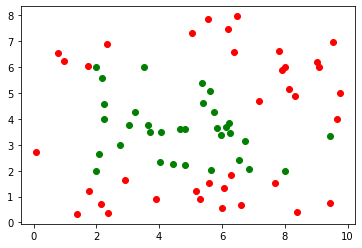

El Error Cuadratico Medio es:  0.0001610615665224788
Muestras bien clasificadas:  66
Muestras mal clasificadas:  4
Presicion:  0.9428571428571428 

Iteracion  10000 :


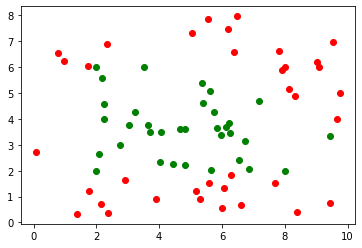

El Error Cuadratico Medio es:  0.00014748602053035308
Muestras bien clasificadas:  67
Muestras mal clasificadas:  3
Presicion:  0.9571428571428572 

Iteracion  12000 :


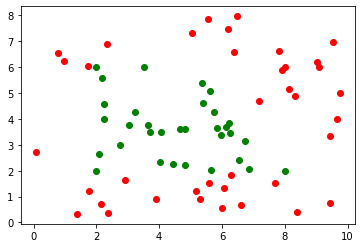

El Error Cuadratico Medio es:  0.00015386498423637174
Muestras bien clasificadas:  67
Muestras mal clasificadas:  3
Presicion:  0.9571428571428572 

Iteracion  14000 :


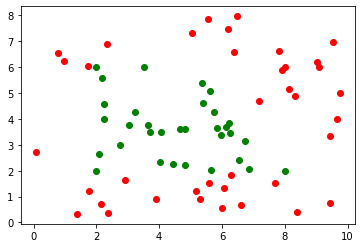

El Error Cuadratico Medio es:  0.0001405287194580426
Muestras bien clasificadas:  67
Muestras mal clasificadas:  3
Presicion:  0.9571428571428572 

Iteracion  16000 :


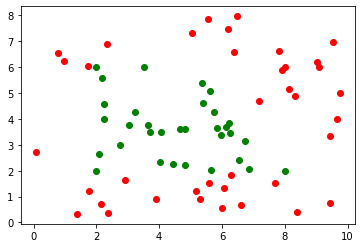

El Error Cuadratico Medio es:  0.0001351240447801418
Muestras bien clasificadas:  67
Muestras mal clasificadas:  3
Presicion:  0.9571428571428572 



In [ ]:
# Pesos de capa inicial -> capa oculta
w1_B = [ [0.0] * 4 ] * 3
for i in range(3):
  w1_B[i] = [random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0)]
# Pesos de capa oculta -> capa final
w2_B = [random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0), random.uniform(0.0, 2.0)]
# Conjunto de entrenamiento
D = v_train_B
# Factor de aprendizaje
cn = 0.1
# Funcion de activacion sigmoide
def Sigmoide(x):
  return 1 / (1 + math.exp(-x))
# Iteraciones
N = 16001

# Entrenamiento
fw1_B, fw2_B = training_perceptrons(w1_B, w2_B, D, cn, Sigmoide, N)

En este conjunto obtenemos una mayor presicion de:
$$ 0.9571428571428572, $$
y un 
$$MSE = 0.0001351240447801418.$$
Por lo tanto, vemos que el conjunto de entrenamiento fue mas adecuado y el perceptron aprendio mejor dicho conjunto.

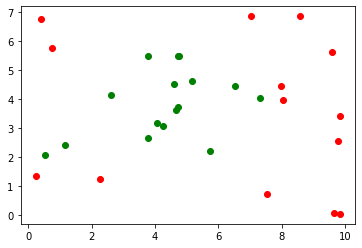

El Error Cuadratico Medio es:  0.00017637246472667438
Muestras bien clasificadas:  27
Muestras mal clasificadas:  3
Presicion:  0.9 



In [ ]:
# Conjunto de evaluacion
D = v_evaluation_B

res_B = perceptron(D, fw1_B, fw2_B, Sigmoide)

printResults(D, res_B)

Con este conjunto de entrenamiento obtenemos una presicion de $9.0$ con el conjunto de evaluacion, clasificando unicamente $3$ puntos de manera incorrecta. Entonces podemos interpretar esto como el perceptron del segundo conjunto de datos obtuvo un mejor aprendizaje y por lo tanto mejor presicion.

## Inciso entregables de la tarea

### ¿Cuantas iteraciones fueron necesarias?
Para el entrenamienot del perceptron pusimos un error de $10^{-5}$ utilizando el Error Cuadratico Medio, sin embargo, en ninguno de los conjuntos muestra se alcanzo dicho error, por lo tanto, se realizaron 16001 iteraciones para los resultados obtenidos

### Tamaño y parametros del perceptron aprendido
Para el perceptron multicapas de dos capas, tenemos que la capa oculta tiene 4 neuronas y la capa salida tiene unicamente una ya que es una seleccion binaria. Como parametros interpretamos la presicion del perceptron entrenado, en donde para el primer conjunto de datos, la presicion es:
$$0.9428571428571428,$$
y para el segundo es:
$$0.9571428571428572 .$$

### Expliacion de cada neurona de la capa oculta.
Hacemos uso de 4 neuras para la capa oculta, esto dado que el rectangulo consta de 4 vertices, entonces el trabajo esperado de cada neura es marcar un recta de tal manera que cada recta divida a los puntos positivos y negativos, entonces la area generada por la interseccion de las 4 rectas denota el area selecciona para la clasificacion de puntos positivos. El area que se encuentra fuera del area antes mencionada es considerada como el area de los puntos negativos.

## Bibliografia
- [Perceptron Multicapa | Redes Neuronales 03](https://www.youtube.com/watch?v=GxwGeN2a7V8)
- [Derivation of Backpropagation](https://drive.google.com/file/d/1oI2X8Yo89XUFkHqmqs9J0rwENcppYGT2/view)
- [Redes Neuronales](https://drive.google.com/file/d/1ZIr8QIEx7ZAUmbyn2ith03olT_quad5-/view)